In [241]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
sns.set()  

## 1. Introduction

With the world's biggest soccer competition recently held in Qatar, it's now time to look at the conclusions that can be drawn from this event, which for the whole planet is a reflection of the state of world soccer and the latest trends. 

Fans and analysts around the world have been debating two opposing visions of the sport for years. One that favors statistics and summarizes soccer in numbers, believing that the outcome of a match depends largely on which of the two teams has the most stats in its favor, and those with the 'old-fashioned' vision considering that soccer is the best sport in the world precisely because it is unpredictable and each team has a chance of going far in a competition regardless of its statistics, which would be the beauty of the sport.    

At the end of this World Cup, this debate is still raging, because despite a few surprise teams such as Morocco, whose chances of going far were considered very slim at the start of the competition and who made it all the way to the semi-finals, it was actually Argentina and France, the two teams the bookmakers rated as favourites, who met in the final. Our primsry research goal today as statisticians is to prove one side right by trying to build a predictive model that will actually predict the outcome (win or not) of a match for a new dataset. For our secondary research goal, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between all the variables in our dataset. For this objective we will use 6 explanatory variables (5 numerical and 1 categorical) that are central to soccer and how we play it.

By creating such a predictive model, we want to provide an insights to the continuing discussion between statistics enthusiasts and people who claim that soccer is unpredictable. The ability to forecast a match outcome could have some practical implications for sports gamblers and betting enthusiasts as well. These people stand to gain from a predictive model that provides a good insight for making good decisions in the world of sports betting.

For a sports gambler or a betting enthusiast, the preference for the classifier would depend on their specific goals and risk tolerance. If their primary goal is to maximize profits by correctly predicting a win, they might prefer a classifier that is better at classifying positives, even if it means misclassifying some negatives. At the opposite, if they prioritize minimizing losses and avoid bad predictions of wins, they might lean towards a classifier that would be better at classifying negatives, even if it means missing out on some positive predictions. The optimal balance would only depend on the user's risk aversion and gambling strategy.

Our research is based on two important articles that help shape our study on predicting soccer outcomes and using statistics. The first article by Hubáček, Šourek, and Železný, called "Exploiting sports-betting market using machine learning" (International Journal of Forecasting, 2019), talks about using computer methods to be better at sports betting. The second article by Wunderlich and Memmert, "Analysis of the predictive qualities of betting odds and FIFA World Ranking: evidence from the 2006, 2010, and 2014 Football World Cups" (Journal of Sports Sciences, 2016), looks at how good betting predictions and soccer rankings are. By using these articles, our research fits into what others have already studied and adds to what we know about predicting soccer using numbers. (Hubáček et al., 2019; Wunderlich & Memmert, 2016)

The accuracy of our predictive model at the end of our analysis can then give us an idea of whether the outcome of a match is so easy to predict thanks to statistics, or whether soccer is really so unpredictable. Ideally, we would also like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the statistics in the dataset. This could be a great way for someone interested in both sports and statistics to understand how both disciplines have close ties, and fans all around the world to put into perspective the role of statistics in sport analysis.

## 2. Dataset Discussion

For our analysis, we used the dataset of all 64 matches of the 2022 Fifa World Cup, obtained from Kaggle (https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset). This dataset is ideal for performing data analysis of the matches of the 2022 Fifa World Cup. For the data to be collected, the players are provided with detailed tracking data recorded by multiple cameras positioned around the stadium. These statistics and metrics are synchronised with match footage taken from different camera angles.

Since a vast array of features are present, not only can a wide range of exploratory data analysis techniques be deployed, but also different plots and visualization techniques can be used to determine if soccer is that predictable.

Each row correspond to a different game that occured during the competition, including details such as teams, match outcome, and various statistics. However, the dataset is likely limited to information related to the matches themselves, such as team statistics and the outcomes by themselves. It may not include other contextual data, player-specific details, or external factors influencing the matches, like weather, attendance, etc... 

If the dataset lacks certain types of observations,, it could influence the comprehensiveness of the predictive model. The person interested in sports betting might need to consider additional data sources to enhance the model's accuracy and relevance to real world scenarios, especially since those factors have been proven to influence the outcome of a game in other competitions. Incorporating a broader set of features could provide more nuanced insights into soccer match outcomes.

In [242]:
df_world_cup = pd.read_csv('World_cup.csv')
df_world_cup.head()

,team1,team2,possession_team1,possession_team2,possession in contest,number_of_goals_team1,number_of_goals_team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive_pressures_applied_team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [243]:
df_world_cup.shape[0]

64

The response variable in our model is a binary indicator representing whether a soccer match is won or not. This categorical outcome simplifies the predictive task by classifying matches into two distinct categories. For the explanatory variables, possession reflects a team's control over the ball during a match, while the number of passes made gives us an idea into teamwork and offensive strategies. Goals scored quantifies a team's success in attack. Total attempts and on-target attempts gives perspectives on offensive approaches and precision of the shots. Additionally, we plan to introduce a categorical variable, Defensive Team, in the next section to further analyse the importance of defense in soccer.

## 3. Dataset Cleaning

As this dataset contains more than 88 columns which, although containing very interesting data on match content, will not be of any real use to us in our analysis, we will keep only those we consider useful or interesting in the context of our analysis. These are, of course, possession, number of shots, shots on target, crosses, passes and defensive pressure applied. To make the analysis simpler, we're going to focus solely on the statistics of the home team, i.e. Team 1.

In [244]:
df = df_world_cup[['possession_team1', 'number_of_goals_team1', 'number_of_goals_team2', 'total_attempts_team1', 'on_target_attempts_team1', 'passes_team1', 'defensive_pressures_applied_team1']]
df.head()

,possession_team1,number_of_goals_team1,number_of_goals_team2,total_attempts_team1,on_target_attempts_team1,passes_team1,defensive_pressures_applied_team1
0,42%,0,2,5,0,450,256
1,72%,6,2,13,7,809,139
2,44%,0,2,14,3,383,263
3,51%,1,1,6,1,569,242
4,64%,1,2,14,6,610,163


Let's now check whether our dataset contains any explicit missing values in the form of NaN.

In [245]:
df.isna().sum()

possession_team1                     0
number_of_goals_team1                0
number_of_goals_team2                0
total_attempts_team1                 0
on_target_attempts_team1             0
passes_team1                         0
defensive_pressures_applied_team1    0
dtype: int64

We can see that none of the columns contain explicit missing values, which is good because we don't have to drop them.

Now let's check whether the dataset contains explicit missing values. To do this, let's check the type of values contained in each column, which should all be of type int64 or float64 as they are numeric values.

In [246]:
df.dtypes

possession_team1                     object
number_of_goals_team1                 int64
number_of_goals_team2                 int64
total_attempts_team1                  int64
on_target_attempts_team1              int64
passes_team1                          int64
defensive_pressures_applied_team1     int64
dtype: object

We can see that for all columns, the values are of float64 and int64 types, except for the possession column. If we look at the column, we can see that this is because the possession percentages are expressed as percentages and not as fractions. To remedy this, we're going to use a simple line of code that converts the percentages expressed as objects into fractions, i.e. floats64. 

In [247]:
df['possession_team1'] = df['possession_team1'].str.rstrip('%').astype('int') / 100.0

df.dtypes

possession_team1                     float64
number_of_goals_team1                  int64
number_of_goals_team2                  int64
total_attempts_team1                   int64
on_target_attempts_team1               int64
passes_team1                           int64
defensive_pressures_applied_team1      int64
dtype: object

Now that we've checked the type of each value again and can confirm that they're all now either int64 or float64, we'll carry on working.

Notice that we don't have any columns dedicated to the result of the game? We'll remedy that in the next few lines of code. First, we create a Goal_difference column that tells us the goal difference in favor of team 1.

In [248]:
df['Goal_difference'] = df['number_of_goals_team1'] - df['number_of_goals_team2']
df = df.drop('number_of_goals_team2', axis=1)

Now we create a new column called Result_team1 which tells us the result of the match based on the goal difference we've just calculated (win, draw or loss).


In [249]:
df['Win'] = df['Goal_difference'] > 0
df = df.drop('Goal_difference', axis=1)
df.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,defensive_pressures_applied_team1,Win
0,0.42,0,5,0,450,256,False
1,0.72,6,13,7,809,139,True
2,0.44,0,14,3,383,263,False
3,0.51,1,6,1,569,242,False
4,0.64,1,14,6,610,163,False


There is a certain cliché in soccer that says that defensive teams are usually weaker teams that use defense as a way to reduce their chances of getting beaten. Some people also think that playinf defensive is a strategy like any other and that good teams could use it to mark their solidity and a way to get the opponent tired to score on counter attack. We create a new categorical variable called 'Defensive team', that would be marked as true if the team's defensive pressure is high enough and its total attemps is low enough. We also drop the variable Defensive pressure since it is already linked to our new categorical variable and would also complicate our predictive model which could lead to overfitting to our current dataset.

In [250]:
df['Defensive_Team'] = (df['defensive_pressures_applied_team1'] > 300) & (df['total_attempts_team1'] < 15)
df= df.drop('defensive_pressures_applied_team1', axis=1)
df

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,Win,Defensive_Team
0,0.42,0,5,0,450,False,False
1,0.72,6,13,7,809,True,False
2,0.44,0,14,3,383,False,False
3,0.51,1,6,1,569,False,False
4,0.64,1,14,6,610,False,False
...,...,...,...,...,...,...,...
59,0.54,1,14,6,508,False,False
60,0.34,3,10,7,408,True,True
61,0.34,2,14,2,358,True,True
62,0.45,2,14,4,491,True,False


Our categorical explanatory variable has enough observations that correspond to all levels, which means our new categorical variable 'Defensive Team' will likely not lead to overfitting our current model.

For each pair of numerical variables we plot a scatterplot to detect the presence of any outlier.

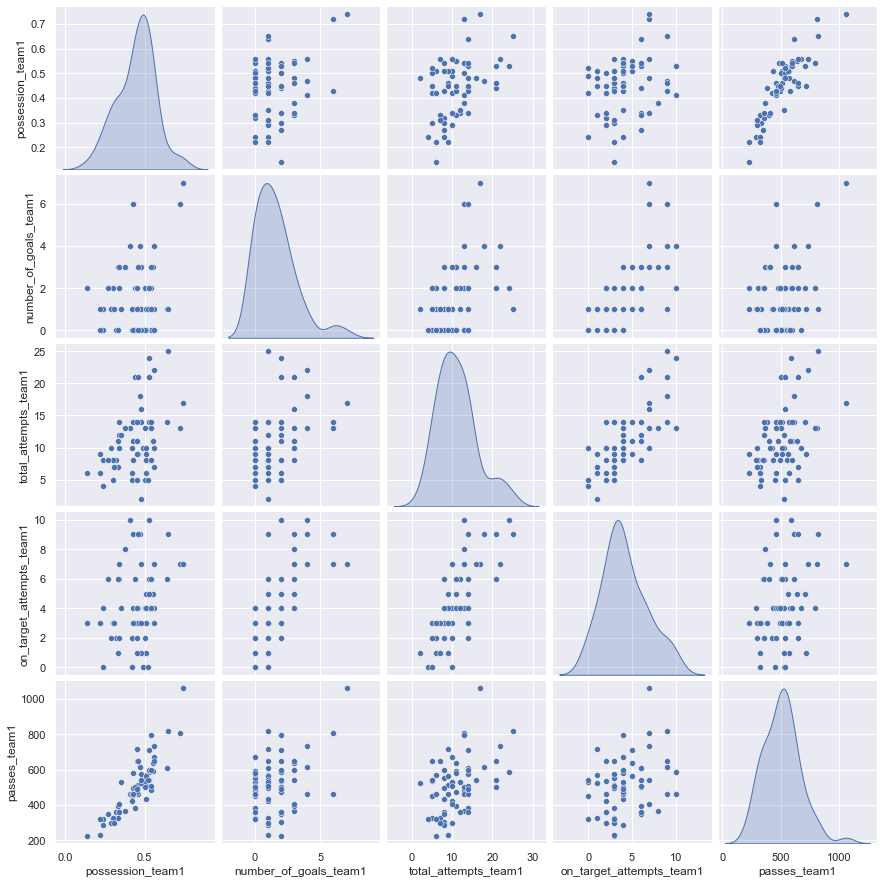

In [251]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.show()

Looking at all the scatterplots, we observe the presence of an outlier for the passes_team1 variable, we visualize the variable before dropping it, using a boxplot.

Text(0.5, 0, 'Passes completed by team1')

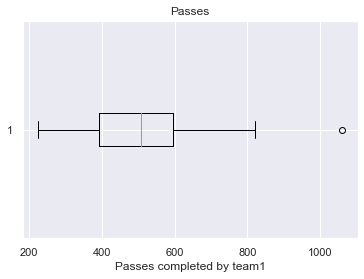

In [252]:
plt.boxplot(df['passes_team1'], vert=False)
plt.title('Passes')
plt.xlabel('Passes completed by team1')

For the number of passes, we observe an outlier which is also the highest value of the column. Let's find the outlier here and drop it. Dropping outliers in our dataset can have both advantages and drawbacks. On the positive side, removing outliers can make our analysis more accurate by reducing the impact of extreme values that might skew our results. This can lead to a clearer understanding of the overall patterns in the data. However, the downside is that by removing outliers, we might lose some valuable information. In this case, we only got rid of one outlier so the impact of that removal would not be too important in building our predictive model.

In [253]:
outlier = df['passes_team1'].max()
df = df.drop(df[df['passes_team1'] == outlier].index)

There is one duplicate in our dataset (Morocco vs. Croatia), but we will not drop it since the statistics for this game are different the two times since Morocco played Croatia twice during the competition, in the group stage then in the match for the 3rd place. Getting rid of duplicates could be an additional step taken in the process of data cleaning, however in this case it will not be necessary so no extra step will be taken and we can finally start working on our predictive model using our clean dataset.

## 4. Preliminary Analysis

For our preliminary analysis, we visualize the relationship between our explanatory variable and response variable, to determine which variable will have the strongest relationship with our response variable and which one will have the weakest. We first start by visualizing the relationship between numerical explanatory variable and our 0/1 response variable.

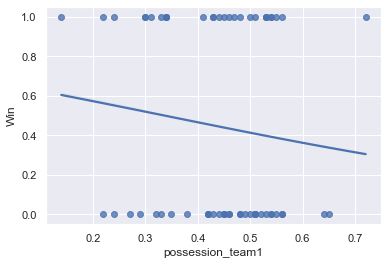

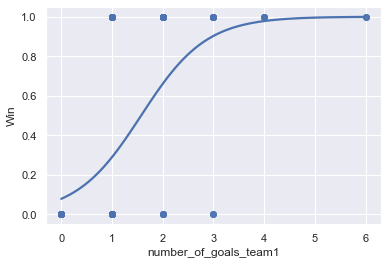

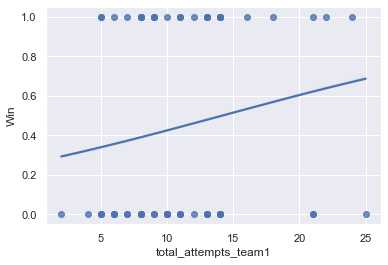

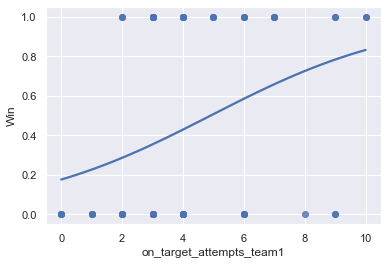

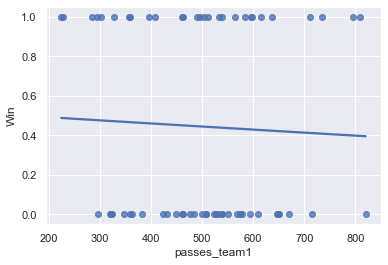

In [256]:
def plot_relationship(df, x_var):
    sns.regplot(x=x_var, y='Win',
            data=df,
            logistic=True,
            ci=True)
    plt.show()

numerical_variables = [
    'possession_team1',
    'number_of_goals_team1',
    'total_attempts_team1',
    'on_target_attempts_team1',
    'passes_team1',]

for var in numerical_variables:
    plot_relationship(df, var)

The strongest relationship is the one with the visualization that looks the most like a logistic regression model, so in this case the relationship between the explanatory variable 'number_of_goals_team1' and the 0/1 response variable. The weakest relationship is the one that looks the least like a logistic regression model so between 'passes_team1' and the 0/1 response variable.

We now look at the relationship between our categorical variable 'Defensive_Team' and our 0/1 response variable.

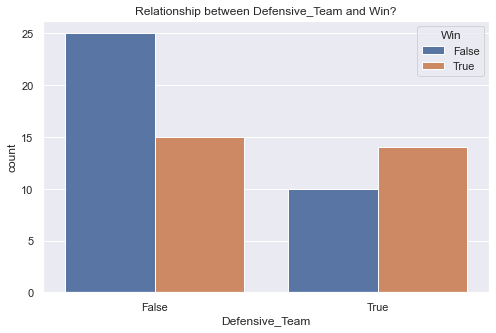

In [173]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Defensive_Team', hue='Win', data=df)
plt.title('Relationship between Defensive_Team and Win')
plt.show()

We can observe that there is a significant difference in the barplots showing the relationship between the chances of a team winning and if that team would be considered Defensive. We notice that Teams that are considered defensive will have more chances of winning while non-defensive teams will lose or draw more often.

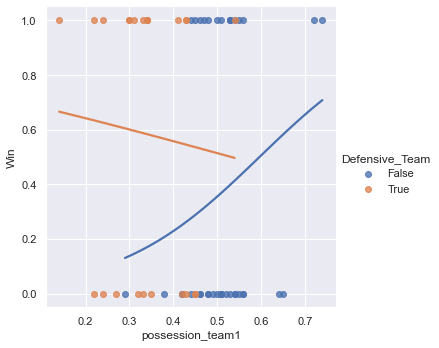

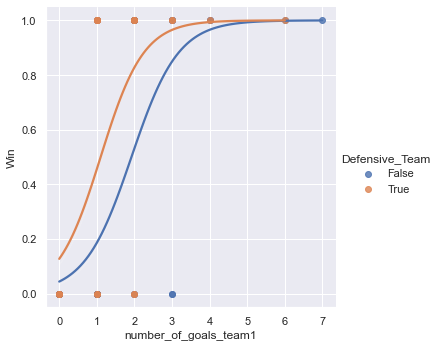

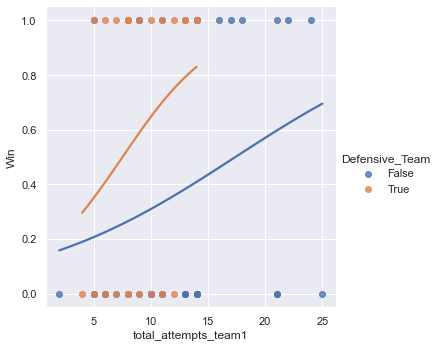

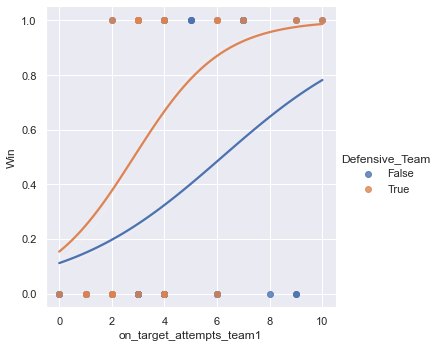

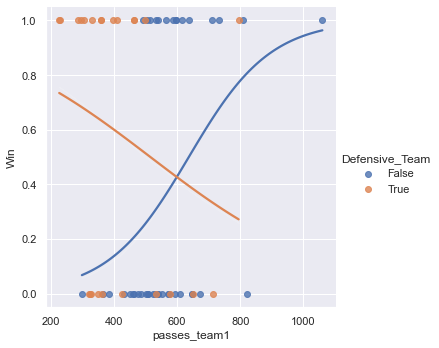

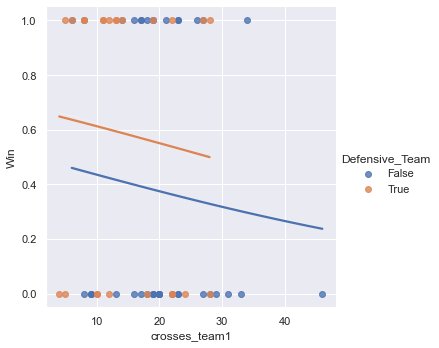

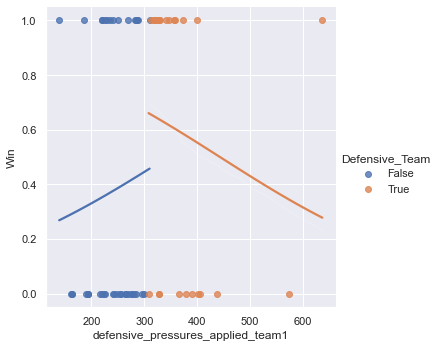

In [174]:
def interaction_relationship(df, x_var):
    sns.lmplot(x=x_var, y='Win',
            hue= 'Defensive_Team',
            data=df,
            logistic=True,
            ci=False)
    plt.show()

for var in numerical_variables:
    interaction_relationship(df, var)

Because there is a large difference between the two logistic regression model slopes, we can conclude that there is an interaction effect between 'passes_team1' and 'Defensive_Team' in how they impact the predicted probability a game is won.

## 5. Model Data Preprocessing

We now create a new 0/1 variable in the dataset in which Winning=1 and Losing=0.

In [175]:
df['Win'] = df['Win'].replace({True: 1, False: 0})
df = df.drop(['crosses_team1', 'defensive_pressures_applied_team1', 'Goal_difference'], axis=1)
df.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,Win,Defensive_Team
0,0.42,0,5,0,450,0,False
1,0.72,6,13,7,809,1,False
2,0.44,0,14,3,383,0,False
3,0.51,1,6,1,569,0,False
4,0.64,1,14,6,610,0,False


Now, we create a features matrix and target array.

In [176]:
X = df[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'on_target_attempts_team1', 'passes_team1', 'Defensive_Team']]
X.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,Defensive_Team
0,0.42,0,5,0,450,False
1,0.72,6,13,7,809,False
2,0.44,0,14,3,383,False
3,0.51,1,6,1,569,False
4,0.64,1,14,6,610,False


In [177]:
Y = df['Win']
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Win, dtype: int64

Now, we scale our numerical explanatory variables so that we can focus on our secondary research goal of interpretability.

In [178]:
scaler = StandardScaler()
scaled_expl_vars = scaler.fit_transform(X[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'on_target_attempts_team1', 'passes_team1']])
scaled_expl_vars

array([[-0.22201411, -1.02534108, -1.2446747 , -1.67631345, -0.38366922],
       [ 2.31529   ,  2.87298541,  0.37688623,  1.11546509,  1.93063481],
       [-0.0528605 , -1.02534108,  0.57958135, -0.47983694, -0.81558669],
       [ 0.53917712, -0.37562   , -1.04197958, -1.27748795,  0.38346777],
       [ 1.63867557, -0.37562   ,  0.57958135,  0.71663958,  0.64777547],
       [ 0.87748434, -1.02534108, -0.028504  , -0.08101143,  0.544631  ],
       [ 0.79290753, -1.02534108,  0.37688623, -0.08101143, -0.1580407 ],
       [ 0.96206114,  1.57354324,  2.20114228,  1.11546509,  1.44714511],
       [-1.06778215, -1.02534108, -0.63658935, -0.87866244, -0.96385686],
       [ 1.72325238, -0.37562   ,  2.80922763,  1.9131161 ,  2.00154663],
       [ 2.48444361,  3.52270649,  1.1876667 ,  1.11546509,  3.5551602 ],
       [ 0.11629311, -0.37562   , -0.43389423, -0.47983694,  0.0160156 ],
       [-0.13743731, -0.37562   , -0.63658935, -0.47983694, -0.08068234],
       [ 0.37002352, -1.02534108, -0.2

We also need to translate our categorical explanatory variable into indicator variables in the features matrix, done below:

In [179]:
X['Defensive_Team'] = X['Defensive_Team'].replace({True: 1, False: 0})
X.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,Defensive_Team
0,0.42,0,5,0,450,0
1,0.72,6,13,7,809,0
2,0.44,0,14,3,383,0
3,0.51,1,6,1,569,0
4,0.64,1,14,6,610,0


## 6. Feature Selection with k-Fold Cross-Validation

In this section, we will use k=5 fold cross validation to select a logistic regression model with the highest average test AUC through a backwards elimination algorithm. We can calculate the array of AUC scores, the average, and the standard deviation to get a full hollistic view of the difference between each model.

In [180]:
log_mod = LogisticRegression()

In [181]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
cross_val

KFold(n_splits=5, random_state=100, shuffle=True)

In [182]:
test_fold_auc=cross_val_score(log_mod, X, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.88888889 0.88095238 0.95238095 0.78571429 0.74285714]
Mean Test AUC Score: 0.8501587301587301
Std Test AUC Score: 0.07558356156957308


We can see that the full model as a Mean Test AUC Score of 0.85. Now, we will begin the first iteration of the backwards elimination algorithm.

In [183]:
X_reduced_1 = X[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'on_target_attempts_team1', 'Defensive_Team']]
X_reduced_1.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,Defensive_Team
0,0.42,0,5,0,0
1,0.72,6,13,7,0
2,0.44,0,14,3,0
3,0.51,1,6,1,0
4,0.64,1,14,6,0


In [184]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.83333333 0.88095238 0.95238095 0.78571429 0.82857143]
Mean Test AUC Score: 0.8561904761904762
Std Test AUC Score: 0.0567766040411005


In [185]:
X_reduced_1 = X[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'passes_team1', 'Defensive_Team']]
X_reduced_1.head()

,possession_team1,number_of_goals_team1,total_attempts_team1,passes_team1,Defensive_Team
0,0.42,0,5,450,0
1,0.72,6,13,809,0
2,0.44,0,14,383,0
3,0.51,1,6,569,0
4,0.64,1,14,610,0


In [186]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.88888889 0.88095238 0.95238095 0.80952381 0.88571429]
Mean Test AUC Score: 0.8834920634920636
Std Test AUC Score: 0.04529347765590302


In [187]:
X_reduced_1 = X[['possession_team1', 'number_of_goals_team1', 'passes_team1', 'on_target_attempts_team1', 'Defensive_Team']]
X_reduced_1.head()

,possession_team1,number_of_goals_team1,passes_team1,on_target_attempts_team1,Defensive_Team
0,0.42,0,450,0,0
1,0.72,6,809,7,0
2,0.44,0,383,3,0
3,0.51,1,569,1,0
4,0.64,1,610,6,0


In [188]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.86111111 0.88095238 0.95238095 0.76190476 0.8       ]
Mean Test AUC Score: 0.8512698412698413
Std Test AUC Score: 0.06605463583728148


In [189]:
X_reduced_1 = X[['possession_team1', 'passes_team1', 'on_target_attempts_team1', 'total_attempts_team1', 'Defensive_Team']]
X_reduced_1.head()

,possession_team1,passes_team1,on_target_attempts_team1,total_attempts_team1,Defensive_Team
0,0.42,450,0,5,0
1,0.72,809,7,13,0
2,0.44,383,3,14,0
3,0.51,569,1,6,0
4,0.64,610,6,14,0


In [190]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.80555556 0.69047619 0.71428571 0.4047619  0.6       ]
Mean Test AUC Score: 0.643015873015873
Std Test AUC Score: 0.1359164001349682


In [191]:
X_reduced_1 = X[['passes_team1', 'on_target_attempts_team1', 'total_attempts_team1', 'number_of_goals_team1', 'Defensive_Team']]
X_reduced_1.head()

,passes_team1,on_target_attempts_team1,total_attempts_team1,number_of_goals_team1,Defensive_Team
0,450,0,5,0,0
1,809,7,13,6,0
2,383,3,14,0,0
3,569,1,6,1,0
4,610,6,14,1,0


In [192]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.88888889 0.88095238 0.95238095 0.78571429 0.74285714]
Mean Test AUC Score: 0.8501587301587301
Std Test AUC Score: 0.07558356156957308


In [193]:
X_reduced_1 = X[['passes_team1', 'on_target_attempts_team1', 'total_attempts_team1', 'number_of_goals_team1', 'possession_team1']]
X_reduced_1.head()

,passes_team1,on_target_attempts_team1,total_attempts_team1,number_of_goals_team1,possession_team1
0,450,0,5,0,0.42
1,809,7,13,6,0.72
2,383,3,14,0,0.44
3,569,1,6,1,0.51
4,610,6,14,1,0.64


In [194]:
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Test Fold AUC Scores:', test_fold_auc)
print('Mean Test AUC Score:', test_fold_auc.mean())
print('Std Test AUC Score:', test_fold_auc.std())

Test Fold AUC Scores: [0.86111111 0.85714286 0.95238095 0.76190476 0.77142857]
Mean Test AUC Score: 0.8407936507936509
Std Test AUC Score: 0.06952235991820636


In the first iteration of the backwards elimination algorithm, we can see a clear point where the average test AUC is at it's peak, which would be when we removed the on_target_attempts_team1 variable. We can highlight the model below:

In [195]:
X_reduced_1 = X[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'passes_team1', 'Defensive_Team']]
test_fold_auc=cross_val_score(log_mod, X_reduced_1, Y, cv=cross_val, scoring="roc_auc")
print('Mean Test AUC Score:', test_fold_auc.mean())

Mean Test AUC Score: 0.8834920634920636


## 7. Best Model Discussion

Now, we can create our train test split dataset and fit our model to the training dataframe.

In [196]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=101)

X_train = df_train[['possession_team1', 'number_of_goals_team1', 'total_attempts_team1', 'passes_team1', 'Defensive_Team']]
Y_train = df_train['Win']

log_mod = LogisticRegression()

log_mod.fit(X_train, Y_train)

LogisticRegression()

In [257]:
intercept = log_mod.intercept_[0]
coefficients = log_mod.coef_[0]

print("Logistic Regression Equation:")
print(f"P^(Win=1) = 1 / (1 + exp({intercept} + {coefficients[0]}*possession_team1 + {coefficients[1]}*number_of_goals_team1 + {coefficients[2]}*total_attempts_team1 + {coefficients[3]}*passes_team1 + {coefficients[4]}*Defensive_Team))")

Logistic Regression Equation:
P^(Win=1) = 1 / (1 + exp(-1.0747707454571722 + 0.016412744535441663*possession_team1 + 1.283854480128989*number_of_goals_team1 + -0.017679877093412136*total_attempts_team1 + -0.0024039477226907905*passes_team1 + 0.31810884580939336*Defensive_Team))


The remaining explanatory variables do exhibit mutlicollinearity. As we can see in the correlation plot, the pairs passes_team1 + possession_team1 and on_target_attempts_team1 + total_attempts_team1. Since the pairs have a ratio greater then 0.8, we can assume that they exhibit multicollinearity.

In [198]:
df_train.corr()

,possession_team1,number_of_goals_team1,total_attempts_team1,on_target_attempts_team1,passes_team1,Win,Defensive_Team
possession_team1,1.000000,0.286253,0.496749,0.307106,0.860115,-0.026806,-0.721992
number_of_goals_team1,0.286253,1.000000,0.464175,0.605179,0.472537,0.541378,-0.165238
total_attempts_team1,0.496749,0.464175,1.000000,0.818599,0.523735,0.172402,-0.389659
on_target_attempts_team1,0.307106,0.605179,0.818599,1.000000,0.342725,0.334501,-0.238389
passes_team1,0.860115,0.472537,0.523735,0.342725,1.000000,0.065112,-0.479811
Win,-0.026806,0.541378,0.172402,0.334501,0.065112,1.000000,0.057354
Defensive_Team,-0.721992,-0.165238,-0.389659,-0.238389,-0.479811,0.057354,1.000000


Slope Interpretations:

Yes, I believe that the magnitudes of the slopes do show how much of an effect they have on the response variable. This is because the number of goals scored has the highest magnitude, while all the others are below 0.5. This shows that the number of goals scored by a team determines whether they win or not, which makes logical sense. So, the number_of_goals_team1 variable is definetly the most important variable.

Overfitting Explanatory Variables:

Although seen later aswell, a pair of explanatory variables that I believe are overfitting our model are on_target_attempts_team1 and total_attempts_team1. This is because they are very similar variables only because it is at the level of the FIFA World Cup. This means that almsot every attempt would be on target since all of these players are world renowned and quite accurate. Also, our best model occured when we got rid of on_target_attempts_team1, which showcases that this variable was definetly overfitting our model.

We will now create a full logistic regression model in order to plot the ROC curve.

In [199]:
full_mod = smf.logit(formula='Win~possession_team1+number_of_goals_team1+total_attempts_team1+passes_team1+Defensive_Team', data=df_train).fit()
full_mod.summary()

Optimization terminated successfully.
         Current function value: 0.453287
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                   51
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3135
Time:                        23:49:43   Log-Likelihood:                -23.118
converged:                       True   LL-Null:                       -33.675
Covariance Type:            nonrobust   LLR p-value:                 0.0007705
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.5263      2.694     -0.938      0.348      -7.806       2.754
Defensive_Team[T.True]     1.0381      1.233      0.842      0.400      -1.379       3.455
possession_team1           4.8961      8.589      0.570      0.569     -11.939      21.731
number_of_goals_team1      1.6249      0.506      3.211      0.001       0.633       2.617
total_attempts_team1      -0.0360      0.086     -0.417      0.677      -0.205       0.133
passes_team1              -0.0049      0.006     -0.847      0.397      -0.016       0.006
==========================================================================================
"""

In [200]:
phat_test = full_mod.predict(df_test)
phat_test.head()

22    0.414144
16    0.053052
2     0.059769
25    0.031164
61    0.762297
dtype: float64

In [207]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['Win'], y_score=phat_test)
auc = roc_auc_score(y_true=df_test['Win'], y_score=phat_test)
auc

1.0

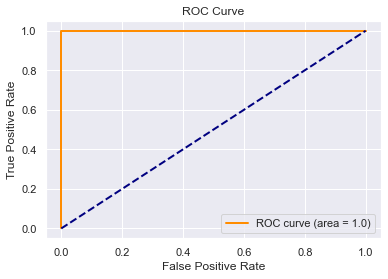

In [209]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

Since we have achieved an AUC score of 1 and since the ROC curve reached the top left corner with a right angle being formed, the model has achieved a true positive rate of 1 (sensitivity/recall) and a false positive rate of 0 (specificity) across different probability thresholds. This could either mean that our model has a perfect prediction rate on the test dataset or that some variables are overfitting the model and could be causing this.

We can choose a threshold of 0.9 since our original AUC was 1. This best meets our research goal based on the research motivation, since they would want this model to accurately guess the correct response variable based on new test datasets.

The test FPR that we would ideally want would be 0, and the test TPR would be 1. 

In [216]:
chosen_threshold = 0.9

# Find the index of the threshold in the array of thresholds
threshold_index = np.argmax(thresholds >= chosen_threshold)

# Calculate the FPR and TPR at the chosen threshold
chosen_fpr = fprs[threshold_index]
chosen_tpr = tprs[threshold_index]

print("Chosen Threshold:", chosen_threshold)
print("Test False Positive Rate (FPR):", chosen_fpr)
print("Test True Positive Rate (TPR):", chosen_tpr)

Chosen Threshold: 0.9
Test False Positive Rate (FPR): 0.0
Test True Positive Rate (TPR): 1.0


An FPR of 0 means that we never guess a team that loses incorrectly as winning, and a TPR of 1 means that our model correctly guesses that a team wins and does not guess incorrectly.

## 8. Additional Analysis/Insight

For the additional analysis, we can create a new visuzliation using a heatmap. 

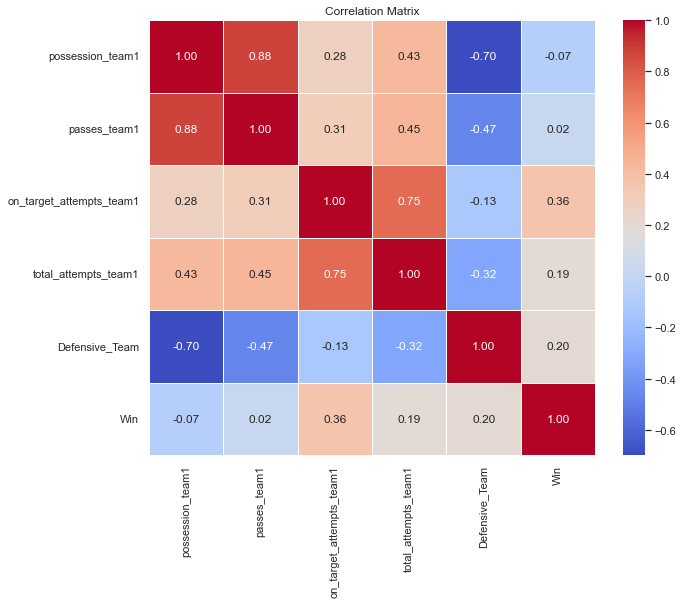

In [218]:
correlation_matrix = df[['possession_team1', 'passes_team1', 'on_target_attempts_team1', 'total_attempts_team1', 'Defensive_Team', 'Win']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In this heat map, we can see that there is a correlation between on_target_attempts_team1 and total_attempts_team1, as making an attempt would make the numbers similar with a positive correlation. Additionally, being a defensive team has a big negative correlation with the possession variable, which makes sense because being a defensive team would mean that you play more on the defense side of the field and have less ball retention.

## 9. Conclusion

I would reccomend our best model to someone else because the average test AUC is 0.88, which is much closer to 1 compared to 0.5. Additionally, when we test it with the full logistic model, the AUC value is 1, which means that we always guess correctly when we are testing with a test dataset. This would be useful to the person that we would reccomend this to, since they could use this model to guess if a soccer team will win based on their previous game statistics!

Regarding the first part, it's essential to acknowledge that while backward elimination is a helpful tool, there's no one-size-fits-all guarantee for finding the absolute best model. It optimizes based on certain criteria, but other methods or combinations of features might yield different results.

For the second part, a simpler option to explore would be to use regularization techniques like L1 or L2 regularization in combination with cross-validation. Regularization helps prevent overfitting, and cross-validation ensures a more reliable estimate of model performance. This straightforward approach can be effective in improving the model's generalization to new data.

However, it's important to note some shortcomings of the analysis. Backward elimination might not capture interaction effects between features, and the assumption of linearity in logistic regression may limit its ability to model complex relationships. Additionally, we should be cautious about potential overfitting, and considering external validation on an independent dataset could provide a clearer picture of the model's performance in real-world scenarios.

In terms of future work, we can go further and create this into a working application, where we can improve the accuracy of the model and create an app that could predict if a soccer team would win or lose in terms of its previous game statistics.

## References

Ondřej Hubáček, Gustav Šourek, Filip Železný, Exploiting sports-betting market using machine learning, International Journal of Forecasting, Volume 35, Issue 2, 2019, Pages 783-796, ISSN 0169-2070, https://doi.org/10.1016/j.ijforecast.2019.01.001. (https://www.sciencedirect.com/science/article/pii/S016920701930007X)

Wunderlich, F., & Memmert, D. (2016). Analysis of the predictive qualities of betting odds and FIFA World Ranking: evidence from the 2006, 2010 and 2014 Football World Cups. Journal of Sports Sciences, 34(24), 2176–2184. https://doi-org.proxy2.library.illinois.edu/10.1080/02640414.2016.1218040